## Practical No. 5
## Name: Siddhi Kothekar
## Batch: A2
## Roll no.: 19

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def knn(X_train, y_train, x_test, k):
    distances = [(distance(X_train[i], x_test), y_train[i]) for i in range(len(X_train))]
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [distances[i][1] for i in range(k)]
    label_counts = Counter(k_nearest_labels)
    return label_counts.most_common(1)[0][0]


iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 3

correct_predictions = 0
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
for i in range(len(X_test)):
    predicted_label = knn(X_train, y_train, X_test[i], k)
    actual_label = y_test[i]

    if predicted_label == actual_label:
        correct_predictions += 1

    print("Test sample:", X_test[i])
    print("Actual label:", class_names[actual_label])
    print("Predicted label:", class_names[predicted_label])
    print("-")

accuracy = correct_predictions / len(X_test)
print("Accuracy:", accuracy)

Train set size: 120
Test set size: 30
Test sample: [6.1 2.8 4.7 1.2]
Actual label: versicolor
Predicted label: versicolor
-
Test sample: [5.7 3.8 1.7 0.3]
Actual label: setosa
Predicted label: setosa
-
Test sample: [7.7 2.6 6.9 2.3]
Actual label: virginica
Predicted label: virginica
-
Test sample: [6.  2.9 4.5 1.5]
Actual label: versicolor
Predicted label: versicolor
-
Test sample: [6.8 2.8 4.8 1.4]
Actual label: versicolor
Predicted label: versicolor
-
Test sample: [5.4 3.4 1.5 0.4]
Actual label: setosa
Predicted label: setosa
-
Test sample: [5.6 2.9 3.6 1.3]
Actual label: versicolor
Predicted label: versicolor
-
Test sample: [6.9 3.1 5.1 2.3]
Actual label: virginica
Predicted label: virginica
-
Test sample: [6.2 2.2 4.5 1.5]
Actual label: versicolor
Predicted label: versicolor
-
Test sample: [5.8 2.7 3.9 1.2]
Actual label: versicolor
Predicted label: versicolor
-
Test sample: [6.5 3.2 5.1 2. ]
Actual label: virginica
Predicted label: virginica
-
Test sample: [4.8 3.  1.4 0.1]
Actual 

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from collections import Counter

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
data= pd.read_csv('/content/gdrive/MyDrive/KNN/Pima_India_Diabetes - Pima_India_Diabetes.csv')

Mounted at /content/gdrive


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df = pd.DataFrame(data)

Accuracy: 75.32%


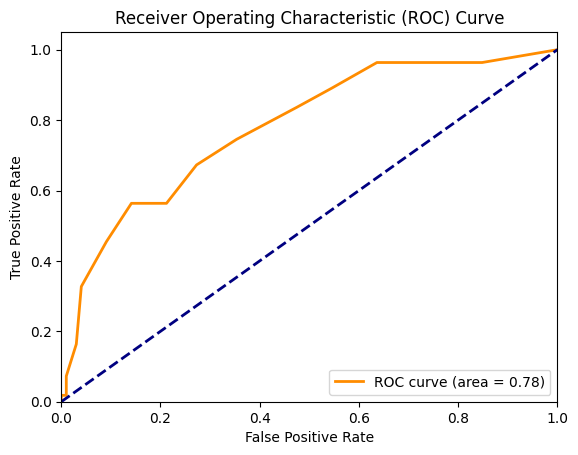

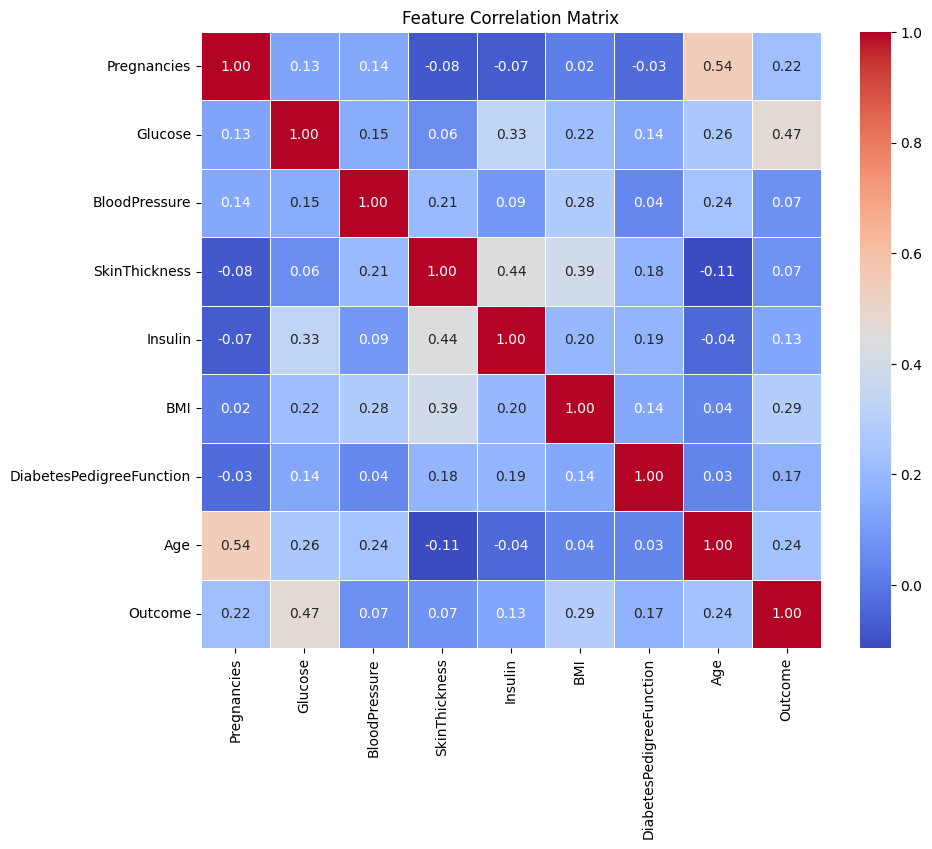

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
X = df.drop(columns=['Outcome'])
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k


    def euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2)**2))


    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train


    def predict_point(self, X_test_point):
        distances = []
        for i in range(len(self.X_train)):
            dist = self.euclidean_distance(X_test_point, self.X_train[i])
            distances.append((dist, self.y_train.iloc[i]))

        distances.sort(key=lambda x: x[0])
        neighbors = distances[:self.k]


        output = [neighbor[1] for neighbor in neighbors]
        vote = Counter(output).most_common(1)[0][0]
        return vote


    def predict(self, X_test):
        predictions = []
        for point in X_test:
            predictions.append(self.predict_point(point))
        return np.array(predictions)


knn = KNNClassifier(k=17)


knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


def get_probabilities(X_test):
    probabilities = []
    for point in X_test:
        distances = []
        for i in range(len(knn.X_train)):
            dist = knn.euclidean_distance(point, knn.X_train[i])
            distances.append((dist, knn.y_train.iloc[i]))
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:knn.k]
        output = [neighbor[1] for neighbor in neighbors]
        vote = Counter(output).most_common(1)[0][0]
        prob = output.count(1) / len(output)
        probabilities.append(prob)
    return np.array(probabilities)


y_probs = get_probabilities(X_test_scaled)


fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
import seaborn as sns
import pandas as pd


correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()
